<h1 align=center><font size = 10> ASM 3 </font></h1>

# Bài toán


Sự phát triển nhanh chóng của việc thu thập dữ liệu đã dẫn đến một kỷ nguyên thông tin mới. Dữ liệu đang được sử dụng nhằm tạo ra các hệ thống giúp con người có thể đạt được nhiều mục tiêu một cách dễ dàng hơn. Trong phim ảnh, một Hệ Thống Đề Xuất ***`(recommender system)`*** có thể giúp con người nhanh chóng tiếp cận những bộ phim mà họ thích, giảm thời gian tìm kiếm và nhanh chóng tiếp cận đến người dùng. Hệ thống Đề xuất là một loại **hệ thống lọc thông tin** cải thiện chất lượng kết quả tìm kiếm và cung cấp các mục phù hợp hơn với mục tìm kiếm hoặc được xác định với lịch sử tìm kiếm của người dùng.


Trong Asm này, chúng ta sẽ xây dựng các loại Hệ Thống Đề Xuất khác nhau cho người dùng. Điều này không chỉ giúp chúng ta có cái nhìn tổng thể với nhiều loại Hệ Thống Đề Xuất khác nhau mà còn giúp chúng ta có thể chọn lựa loại Hệ Thống Đề Xuất phù hợp với bối cảnh. 

1. Bắt đầu từ hệ thống đơn giản nhất là dựa vào đánh giá của người dùng đến từng bộ phim***` (demographic filtering)`***, từ đó chúng ta có thể đề xuất những bộ phim nổi trội, đang được người dùng đánh giá tốt và bắt trend. 

2. Sau đó là Hệ Thống Đề Xuất phức tạp hơn dựa trên nội dung phim ***`(content-based filtering)`***, giúp chúng ta có thể đề xuất những bộ phim tương quan với bộ phim mà người dùng đang xem hoặc chú ý đến. 

3. Cuối cùng chúng ta sẽ được xây dựng một Hệ Thống Đề Xuất dựa vào lịch sử đánh giá của người dùng về các bộ phim thông qua phương pháp Lọc Cộng Tác ***`(collaborative filtering)`***, cụ thể hơn chúng ta sẽ sử dụng một phương pháp khác phục một số nhược điểm của Lọc Cộng Tác là Matrix Factorization. Đồng thời trong phần này, bạn sẽ được tiếp cận một thư viện mới vô cùng hữu ích cho các Hệ Thống Đề Xuất.

# Pipeline 

1. Đọc dữ liệu.

2. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Demographic Filtering.

3. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Content Based Filtering.

  - Xây dựng bằng tổng quan của phim.

  - Xây dựng bằng thông tin của phim bao gồm: đạo diễn, diễn viên chính, keywords, thể loại phim.

4. Xây dựng Hệ Thống Đề Xuất bằng phương pháp Collaborative Filtering bằng SVD.

# Tập dữ liệu

**credits** bao gồm các đặc trưng sau:

* **movie_id**: id của phim
* **cast**: tên của các diễn viên chính và phụ.
* **crew**: tên của các nhân viên trong quá trình sản xuất phim (đạo diễn, editor, người soạn nhạc, v.v.)

**movies** bao gồm các đặc trưng sau:

* **budget**: kinh phí thực hiện bộ phim.
* **genre**: các thể loại của phim.
* **homepage**: liên kết đến trang chủ của bộ phim.
* **id**: thông tin về movie_id như trong tập dữ liệu tmdb_5000_credits.
* **keywords**: các từ khóa hoặc thẻ liên quan đến bộ phim.
* **original_language**: ngôn ngữ trong bộ phim sử dụng.
* **original_title**: tên phim trước khi dịch hoặc chuyển thể.
* **overview**: mô tả ngắn gọn về bộ phim.
* **popularity**: số lượng chỉ định mức độ phổ biến của bộ phim.
* **production_companies**: nhà sản xuất của bộ phim.
* **production_countries**: quốc gia sản xuất của bộ phim.
* **release_date**: ngày mà nó được phát hành.
* **revenue**: doanh thu trên toàn thế giới do bộ phim tạo ra.
* **runtime**: thời gian  của phim tính bằng phút.
* **status**: Đã phát hành hoặc còn là tin đồn.
* **tagline**: khẩu hiệu của phim.
* **title**: tên phim.
* **vote_average**: đánh giá trung bình mà bộ phim nhận được.
* **vote_count**: số lượng đánh giá.

# Chuẩn bị dữ liệu

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Task 1: Đọc dữ liệu creadits và movies và kết hợp 2 dữ liệu thành một dataframe. 

In [2]:
# Nhập code của bạn tại đây
# Đọc dữ liệu từ file Movies
movies_df = pd.read_csv('movies.csv')
# Đọc dữ liệu từ file Creadits
credits_df = pd.read_csv('credits.csv')

# Đổi tên các cột của credits
credits_df.columns = ['id','title','cast','crew']
# Kết hợp credits vào movies
df = movies_df.merge(credits_df, on = ["id", 'title'])
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_.

Điều chỉnh định dạng của một số cột dữ liệu để có thể xử lý dữ liệu hiệu quả hơn về sau.

In [3]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
    
df[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


# **Demographic Filtering**

Với loại đề xuất trong phần này, chúng ta cần

* Một số liệu để chấm điểm hoặc xếp hạng phim
* Tính điểm cho mỗi bộ phim
* Sắp xếp điểm số và giới thiệu bộ phim được đánh giá tốt nhất cho người dùng.

Chúng ta có thể sử dụng đánh giá trung bình làm điểm số nhưng điều này không công bằng. Sự không công bằng này diễn ra khi một bộ phim có đánh giá trung bình là 8.9 nhưng chỉ với 3 lần đánh giá và không được coi là tốt hơn một bộ phim khác có đánh giá trung bình là 7.8 nhưng lại có 40 lần đánh giá.

Do đó chúng ta sẽ sử dụng phương pháp IMDB's weighted rating (wr) cho vấn đề này.

![](https://image.ibb.co/jYWZp9/wr.png)

Trong đó:

* v: số lượng đánh giá cho mỗi bộ phim.
* m: số đánh giá tối thiểu cần thiết để được liệt kê.
* R: đánh giá trung bình của mỗi bộ phim.
* C: giá trị trung bình của các đánh giá trung bình của từng bộ phim.

Chúng ta đã có v(**vote_count**), R(**vote_average**) và C có thể tính được 

## Task 2: Xây dựng hàm tính weighted_rating

Tính giá trị C

In [4]:
# Nhập code của bạn tại đây
C = df['vote_average'].mean()
print(C)

6.092171559442011


Tính giá trị m. Sử dụng số lượng vote chiếm 90% của toàn bộ dữ liệu để thiết lập cho m. Điều này có nghĩa là một bộ phim sẽ được đưa vào so sánh nếu số lượng đánh giá ít nhất bằng 90% của toàn bộ dữ liệu.

In [5]:
# Nhập code của bạn tại đây
m = df['vote_count'].quantile(0.90)
print(m)

1838.4000000000015


Xây dựng hàm tính weighted_rating

In [6]:
# Nhập code của bạn tại đây
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    # Tính toán Demographic Filtering
    return (v/(v+m) * R) + (m/(m+v) * C)

## Task 3: Tính điểm cho từng bộ phim từ hàm weighted_ratings và đề xuất phim

Lọc những bộ phim có số lượng đánh giá ít nhất bằng m

In [7]:
# Nhập code của bạn tại đây
df_m = df.copy().loc[df['vote_count'] >= m]
df_m.shape
df_m

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,176,"[{'id': 1366, 'name': 'shotgun'}, {'id': 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",...,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184,"[{'cast_id': 4, 'character': 'Dr. Lawrence Gor...","[{'credit_id': '52fe4223c3a36847f8006c57', 'de..."
4300,1200000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,500,"[{'id': 2052, 'name': 'traitor'}, {'id': 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",...,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every dog has his day.,Reservoir Dogs,8.0,3697,"[{'cast_id': 20, 'character': 'Mr. White/Larry...","[{'credit_id': '52fe424ac3a36847f8012cb9', 'de..."
4302,1200

Tính điểm cho từng bộ phim bằng hàm weighted_rating

In [8]:
# Nhập code của bạn tại đây
df_m['score'] = df_m.apply(weighted_rating, axis=1)
df_m = df_m.sort_values('score', ascending=False)
df_m

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
1881,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.059258
662,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,"[{'id': 825, 'name': 'support group'}, {'id': ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,"[{'cast_id': 4, 'character': 'The Narrator', '...","[{'credit_id': '55731b8192514111610027d7', 'de...",7.939256
65,185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,"[{'cast_id': 35, 'character': 'Bruce Wayne', '...","[{'credit_id': '55a0eb4a925141296b0010f8', 'de...",7.920020
3232,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,680,"[{'id': 396, 'name': 'transporter'}, {'id': 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,"[{'cast_id': 2, 'character': 'Vincent Vega', '...","[{'credit_id': '52fe4269c3a36847f801caa3', 'de...",7.904645
96,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,"[{'id': 1014, 'name': 'loss of lover'}, {'id':...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...","[{'credit_id': '56e8462cc3a368408400354c', 'de...",7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://greenlanternmovie.warnerbros.com/,44912,"[{'id': 849, 'name': 'dc comics'}, {'id': 4375...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...",...,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,"[{'cast_id': 6, 'character': 'Hal Jordan / Gre...","[{'credit_id': '52fe46a3c3a36847f8109f09', 'de...",5.521697
337,92000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.diehardmovie.com/,47964,"[{'id': 258, 'name': 'bomb'}, {'id': 591, 'nam...",en,A Good Day to Die Hard,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...",...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,"[{'cast_id': 1, 'character': 'John McClane', '...","[{'credi

Đề xuất 10 bộ phim dựa vào phương pháp đề xuất Demographic Filtering

In [9]:
# Nhập code của bạn tại đây

df_m[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## Task 4: Trực quan biểu đồ trực quan 10 bộ phim phổ biến nhất hiện nay bằng chỉ số popularity.

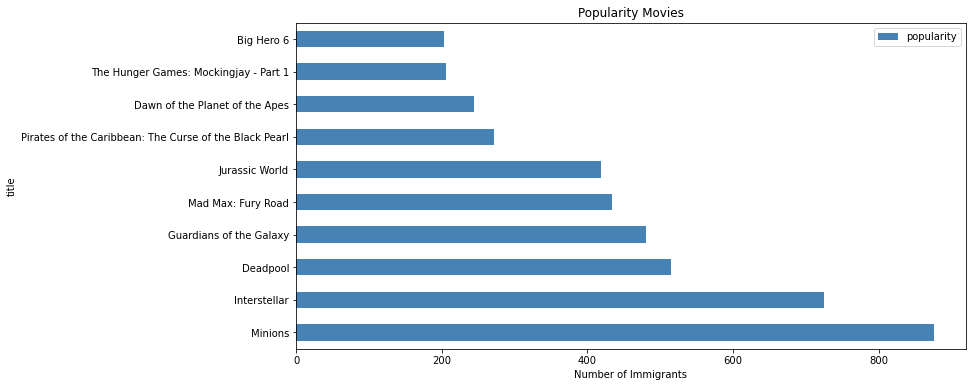

In [10]:
# Nhập code của bạn tại đây
df.sort_values(by='popularity', ascending=False, inplace=True)
df_top10 = df[['title', 'popularity', ]].head(10)
# chọn cột title làm chỉ mục
df_top10.set_index('title', inplace=True)
# vẽ bar chart
df_top10.plot(kind = 'barh',
              figsize=(12, 6), 
              color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Popularity Movies')

    
plt.show()

# **Content Based Filtering**

Trong hệ thống đề xuất này, nội dung của phim (overview, cast, crew, keyword, v.v.) được sử dụng để tìm sự tương đồng của giữa các bộ phim. Sau đó, những bộ phim có nhiều khả năng tương tự nhất được đề xuất.

Chúng ta sẽ tính toán điểm tương đồng theo từng cặp cho tất cả các phim dựa trên mô tả cốt truyện của chúng và đề xuất các phim dựa trên điểm tương đồng đó. Mô tả cốt truyện được đưa ra trong đặc trưng **overview** của tập dữ liệu của chúng tôi.

In [11]:
df['overview'].head(5)

546    Minions Stuart, Kevin and Bob are recruited by...
95     Interstellar chronicles the adventures of a gr...
788    Deadpool tells the origin story of former Spec...
94     Light years from Earth, 26 years after being a...
127    An apocalyptic story set in the furthest reach...
Name: overview, dtype: object

Trước hết, vì đặc trưng **overview** là chuỗi, do đó chúng ta không thể làm việc với chúng. Do đó chúng ta sẽ sử dụng một phương pháp là tính toán vector Term Frequency-Inverse Document Frequency (TF-IDF) cho từng **overview**.

Term Frequency(TF) tần xuất xuất hiện của từ trong văn bản. Còn Inverse Document Frequency (IDF) là mức độ quan trọng của từ.

Công thức:

* TF = (số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)
* IDF(t, D) = log(tổng số lượng văn bản trong bộ dữ liệu D/số lượng văn bản trong bộ dữ liệu D có từ t)

Điều này sẽ cung cấp cho bạn một ma trận trong đó mỗi cột đại diện cho một từ trong từ vựng tổng quan (tất cả các từ xuất hiện trong ít nhất một tài liệu) và mỗi hàng đại diện cho một bộ phim hay cụ thể là một overview.



## Task 5: Tính IF-IDF cho toàn bộ overview

Xử lý dữ liệu bị khuyết cho overview. Thay thế Na bằng chuỗi trống: "".

In [12]:
# Nhập code của bạn tại đây
df['overview'] = df['overview'].fillna('')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Nhập code của bạn tại đây
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape

(4803, 20978)

Với ma trận này, chúng ta đã có thể tính toán giá trị tương tự cho cặp overview.Có nhiều cách để tính giá trị tương tự như euclidean, Pearson and cosine similarity. Trong bài toán này chúng ta sẽ sử dụng similarity để tính giá trị tương tự.

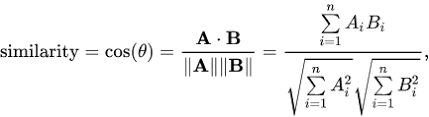

## Task 6: Tính ma trận tương tự cho overview từ TF-IDF

Ma trận này có kích thước nxn, trong đó n là số lượng overview.

Giá trị cột i dòng j trả về mức độ tương tự của overview thứ i và overview thứ j.

In [14]:
from sklearn.metrics.pairwise import linear_kernel

# Nhập code của bạn tại đây
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape

(4803, 4803)

## Task 7: Xây dựng hàm để đề xuất phim dựa vào tổng quan của phim

Hàm sẽ được xây dựng bằng các bước nhỏ sau:

* Lấy index của bộ phim thông qua title.

* Lấy danh sách giá trị tương đồng của bộ phim cụ thể theo index so với tất cả các bộ phim. Chuyển nó thành một danh sách các bộ giá trị trong đó phần tử đầu tiên là index và phần tử thứ hai là giá trị tương tự.

* Sắp xếp danh sách trên theo giá trị tương tự giảm dần.

* Lấy ra 10 phần tử đầu từ danh sách trên (10 phần tử này là 10 bộ phim có mức độ tương tự so với phim hiện tại mà ta muốn khuyến nghị). Chú ý là loại bỏ phần tử đầu tiên và bắt đầu lấy từ phẩn tử thứ 2 vì phần tử đầu tiên là chính bộ phim đó. Do là chính bộ phim đó nên giá trị tương tự rất lớn.

* Trả về tiêu đề theo index có trong danh sách 10 bộ phim mà ta muốn khuyến nghị.

Tạo một pandas Series với value là index của dữ liệu bộ phim, index là title của bộ phim.

In [15]:
# Nhập code của bạn tại đây
series_title = pd.Series(df.index, index=df['title']).drop_duplicates()
series_title[:10]

title
Minions                                                   546
Interstellar                                               95
Deadpool                                                  788
Guardians of the Galaxy                                    94
Mad Max: Fury Road                                        127
Jurassic World                                             28
Pirates of the Caribbean: The Curse of the Black Pearl    199
Dawn of the Planet of the Apes                             82
The Hunger Games: Mockingjay - Part 1                     200
Big Hero 6                                                 88
dtype: int64

In [16]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
    # Nhập code của bạn tại đây
    # Lấy chỉ số của phim phù hợp với tiêu đề
    idx = series_title[title]

    # Nhận điểm số tương đồng theo từng cặp của tất cả các phim có phim đó
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sắp xếp phim dựa trên điểm số tương tự
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Nhận điểm của 10 bộ phim tương tự nhất
    sim_scores = sim_scores[1:11]

    # Nhận chỉ số phim
    movie_series_title = [i[0] for i in sim_scores]

    
    return df['title'].iloc[movie_series_title]

Giả sử người dùng đang xem phim về 'The Dark Knight Rises', hãy thử sử dụng hàm đã thiết kế để xem 10 bộ phim mà chúng ta muốn đề xuất cho người dùng.

In [17]:
get_recommendations(df, 'The Dark Knight Rises')

3150                  Heavy Metal
38       The Amazing Spider-Man 2
3649                Lovely, Still
2262                          CJ7
1572    Forgetting Sarah Marshall
2900      Space Battleship Yamato
1824         The Face of an Angel
20         The Amazing Spider-Man
193                   After Earth
1115           The Sweetest Thing
Name: title, dtype: object

Bạn có thể thấy hầy hết các phim được trả về là phim của DC, tương tự như bộ phim mà người dùng đang xem.

Thực hiện lại điều này với một bộ phim của Marvel như 'The Avengers' 

In [18]:
get_recommendations(df, 'The Avengers')

591                Stardust
3999                    Ida
2299              Leap Year
1669            The Promise
3237                 Splash
4364    Two Girls and a Guy
1563    The Prince of Tides
809            Forrest Gump
4621             Royal Kill
2608       Black Snake Moan
Name: title, dtype: object

Tiếp theo, chúng ta sẽ xây dựng một hệ thống đề xuất khác, ngoài việc chỉ sử dụng overview, chúng ta sẽ sử dụng các dữ liệu khác như 3 diễn viên hàng đầu (actor), đạo diễn, thể loại và keywords

Dữ liệu cột crew cho chúng ta biết được các nhân viên đã tham gia trong quá trình sản xuất phim. Do đó để có được dữ liệu về đạo diễn, bạn cần tách đạo diễn từ crew sang một cột director. 

## Task 8: Lấy ra tên tác giả từ cột crew và lưu vào cột director

In [19]:
# Nhập code của bạn tại đây
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df['director'] = df['crew'].apply(get_director)
df['director']

546            Kyle Balda
95      Christopher Nolan
788            Tim Miller
94             James Gunn
127         George Miller
              ...        
4625           Pece Dingo
4118                  NaN
4727         Jamaa Fanaka
3361       Sharron Miller
4553                  NaN
Name: director, Length: 4803, dtype: object

## Task 9: Lấy ra 3 diễn viên đầu tiên từ cột cast và lưu vào chính cột cast. Làm điều tương tự với keywords và genres

In [20]:
# Nhập code của bạn tại đây
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Kiểm tra xem có hơn 3 phần tử tồn tại hay không. Nếu có, chỉ trả lại ba đầu tiên. Nếu không, hãy trả lại toàn bộ danh sách.
        if len(names) > 3:
            names = names[:3]
        return names

    #Trả lại danh sách trống trong trường hợp dữ liệu bị thiếu / không đúng định dạng
    return []

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [21]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
546,Minions,"[Sandra Bullock, Jon Hamm, Michael Keaton]",Kyle Balda,"[assistant, aftercreditsstinger, duringcredits...","[Family, Animation, Adventure]"
95,Interstellar,"[Matthew McConaughey, Jessica Chastain, Anne H...",Christopher Nolan,"[saving the world, artificial intelligence, fa...","[Adventure, Drama, Science Fiction]"
788,Deadpool,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",Tim Miller,"[anti hero, mercenary, marvel comic]","[Action, Adventure, Comedy]"


## Task 10: Điều chỉnh dữ liệu phù hợp với đầu vào của thuật toán

Chuyển đổi tên và các trường hợp từ khóa thành chữ thường và loại bỏ tất cả các khoảng cách giữa chúng. Điều này được thực hiện để không tính từ Johnny của "Johnny Depp" và "Johnny Galecki" là giống nhau.

In [22]:
# Nhập code của bạn tại đây
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Kiểm tra xem director có tồn tại không. Nếu không, trả về chuỗi trống
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)
    
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
546,Minions,"[sandrabullock, jonhamm, michaelkeaton]",kylebalda,"[assistant, aftercreditsstinger, duringcredits...","[family, animation, adventure]"
95,Interstellar,"[matthewmcconaughey, jessicachastain, annehath...",christophernolan,"[savingtheworld, artificialintelligence, fathe...","[adventure, drama, sciencefiction]"
788,Deadpool,"[ryanreynolds, morenabaccarin, edskrein]",timmiller,"[antihero, mercenary, marvelcomic]","[action, adventure, comedy]"


Tiếp theo chúng ta sẽ kết hợp tất cả dữ liệu này thành một trường dữ liệu duy nhất.

## Task 11: Kết hợp dữ liệu của từng giá trị trong keywords, cast, director, genres thành một chuỗi và lưu vào cột movie_info

In [23]:
# Nhập code của bạn tại đây
def create_movie_info(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df['movie_info'] = df.apply(create_movie_info, axis=1)
df[['movie_info']].head()

,movie_info
546,assistant aftercreditsstinger duringcreditssti...
95,savingtheworld artificialintelligence fatherso...
788,antihero mercenary marvelcomic ryanreynolds mo...
94,marvelcomic spaceship space chrispratt zoesald...
127,future chase post-apocalyptic tomhardy charliz...


## Task 12: Tính CountVectorizer cho từng movie_info

Thay vì tính IF-IDF, lần này chúng ta sẽ tính CountVectorizer cho từng bộ phim bởi vì chúng ta chỉ cần kiểm tra xem một từ có xuất hiện trong đoạn văn hay không. Điều này giống như kiểm tra xem đạo diễn hoặc diễn viên có xuất hiện trong movie_info hay không.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Nhập code của bạn tại đây
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['movie_info'])
count_matrix.shape

(4803, 11520)

## Task 13: Tính ma trận tương tự cho movie_info từ CountVectorizer


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Nhập code của bạn tại đây
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

series_title = pd.Series(df.index, index = df['title'])

Sử dụng hàm **get_recommendations()** với ma trận tương tự mới: **cosine_sim2** để đưa ra những bộ phim đề xuất khi người dùng xem phim 'The Dark Knight Rises'.

In [26]:
get_recommendations(df, 'The Dark Knight Rises', cosine_sim2)

28                 Jurassic World
26     Captain America: Civil War
16                   The Avengers
7         Avengers: Age of Ultron
182                       Ant-Man
47        Star Trek Into Darkness
79                     Iron Man 2
228                      Oblivion
174           The Incredible Hulk
511                         X-Men
Name: title, dtype: object

Làm điều tương tự với phim 'The Godfather'

In [27]:
get_recommendations(df, 'The Godfather', cosine_sim2)

4401    The Helix... Loaded
2410              Good Boy!
1733      The Spy Next Door
727      Jingle All the Way
3670        Running Forever
1053           Galaxy Quest
1496              Snow Dogs
2097      Are We There Yet?
450                 Flubber
2923          St. Trinian's
Name: title, dtype: object

# **Collaborative Filtering**


## Single Value Decomposition

***`Nhược điểm của Lọc Cộng tác về khả năng mở rộng (scalability) và độ thưa thớt (sparsity)`***. Để xử lý vấn đề này chúng ta có thể sử dụng latent factor model (mô hình yếu tố tiềm ẩn) để nắm bắt sử giống nhau của người dùng và mặt hàng.

Về cơ bản, chúng ta muốn biến vấn đề đề xuất thành vấn đề tối ưu hóa. ***`Chúng ta có thể xem đó là mức độ tốt của chúng ta trong việc dự đoán xếp hạng cho các mặt hàng do người dùng cung cấp. Với chi phí càng nhỏ thì dự đoán càng tốt.`***

Một latent factor model mà chúng ta có thể sử dụng là [Single Value Decomposition](https://machinelearningcoban.com/2017/06/07/svd/) mà chúng ta đã tìm hiểu từ [Matrix Factorization](https://machinelearningcoban.com/2017/05/31/matrixfactorization/)

## Single Value Decomposition

Ở phần này chúng ta sẽ sử dụng phương pháp lọc công tác Matrix Factorization bằng phương pháp tối ưu Single Value Decomposition với chi phí càng nhỏ thì càng tối ưu.

### Task 14: Đọc dữ liệu đánh giá phim của người dùng.

In [28]:
# Nhập code của bạn tại đây
df_rating = pd.read_csv('user_ratings.csv')
df_rating.head()

,user_id,movie_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Task 15: Xử lý dữ liệu đầu vào phù hợp với SVD của surprise

Tham khảo đường dẫn sau: [Use custom data](https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset)

In [29]:

import surprise
from surprise import Reader, Dataset


# Nhập code của bạn tại đây
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating[['user_id', 'movie_id', 'rating']], reader)

### Task 16: Sử dụng K-Fold để huấn luyện và đánh giá mô hình


Tham khảo đường dẫn sau: [Use cross-validation iterators
](https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators)






In [30]:
from surprise.model_selection import KFold
from surprise import accuracy, SVD

# Nhập code của bạn tại đây
data = Dataset.load_builtin("ml-100k")

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9508
RMSE: 0.9395
RMSE: 0.9473


Root Mean Sqaure Error trung bình là 0,90, là quá đủ tốt cho trường hợp của chúng ta. Bây giờ chúng ta hãy dự đoán kết quả người dùng có id = 1 với phim có id là 302.


In [32]:
# Nhập code của bạn tại đây
predictions = algo.fit(trainset).test(testset)
print(predictions[0])
print(algo.predict('1', '302', r_ui = 5.0))

user: 497        item: 181        r_ui = 5.00   est = 4.00   {'was_impossible': False}
user: 1          item: 302        r_ui = 5.00   est = 4.51   {'was_impossible': False}


**Câu hỏi: Người dùng có id là 1 đánh giá bao nhiêu cho phim có id là 302.**

Trả lời: với r_ui là 5 thì ước tính estimate là 4.51